 87%|████████▋ | 20/23 [00:39<00:05,  1.76s/it]C:\Users\Luke\Github\svsm_ml_2022\Volatility.py:169: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(figsize=(15,3)) #plot subplots
100%|██████████| 23/23 [00:40<00:00,  1.78s/it]


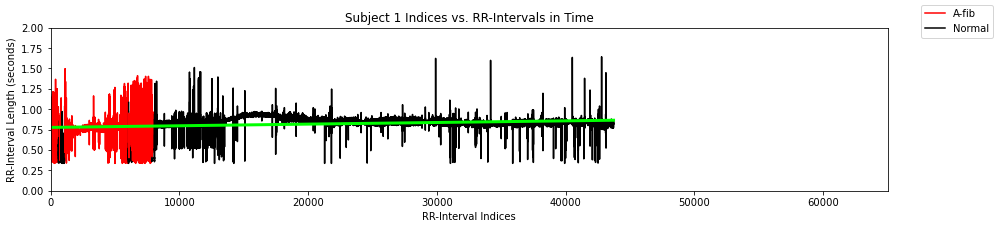

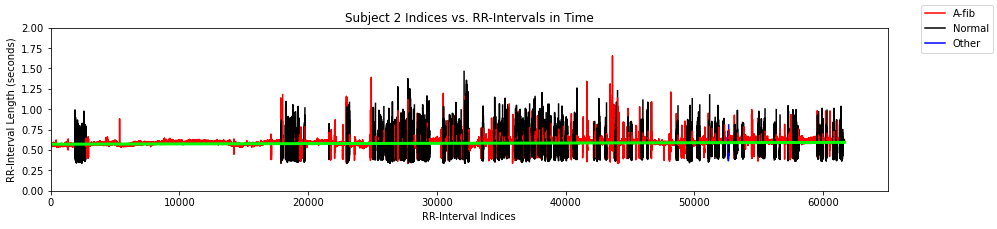

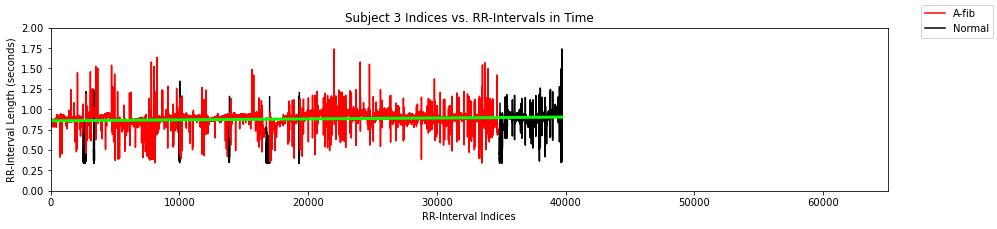

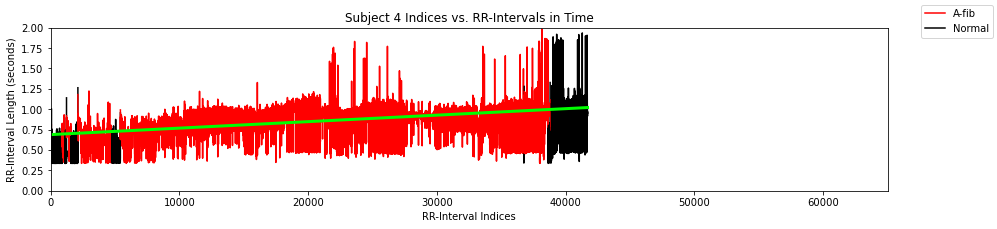

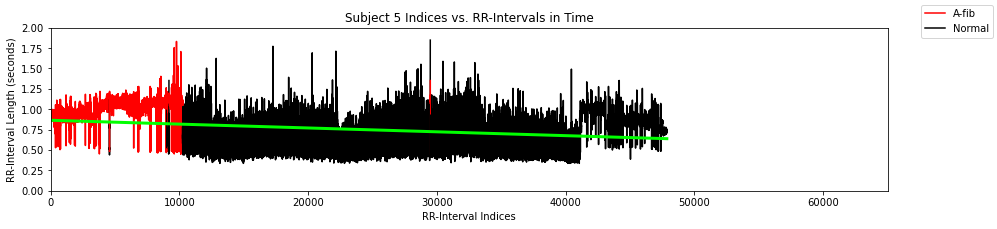

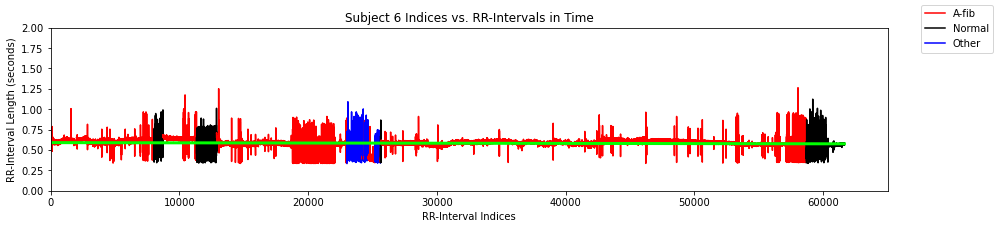

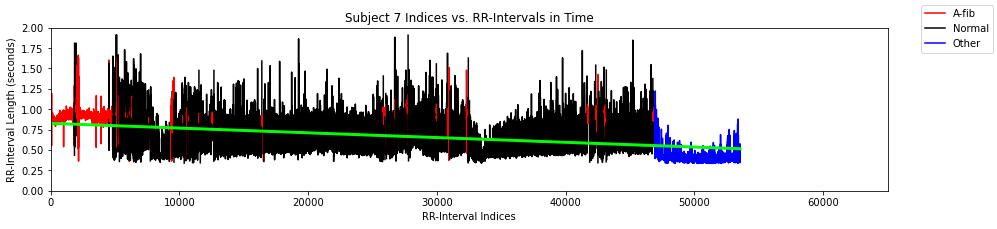

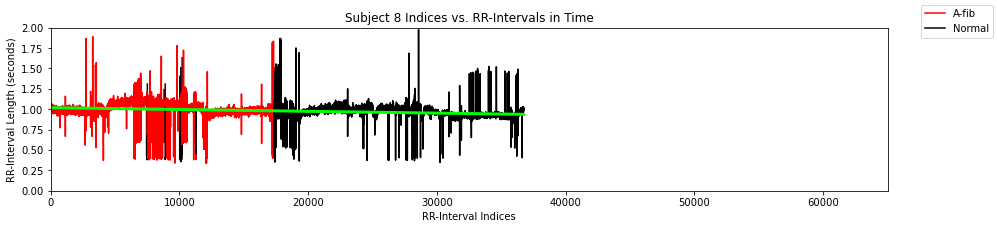

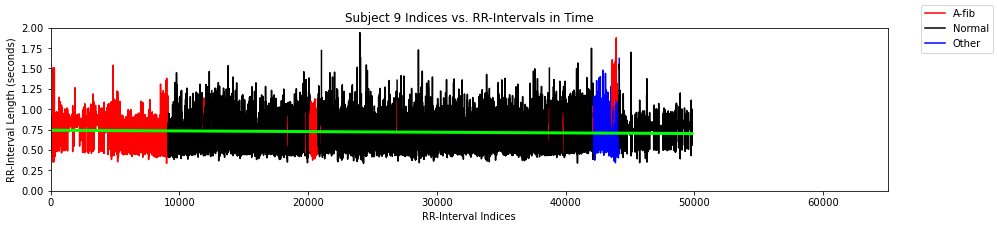

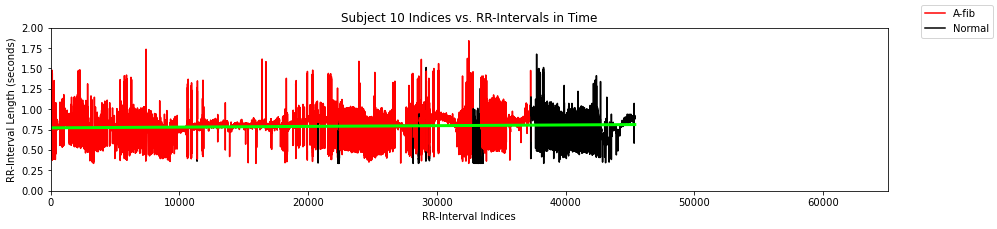

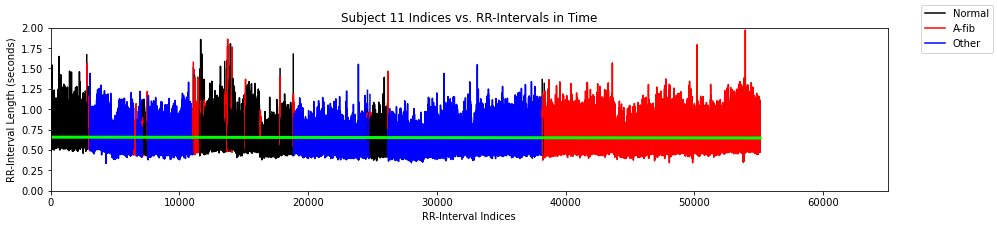

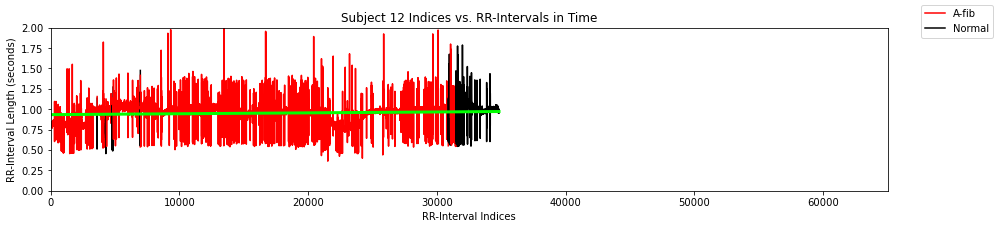

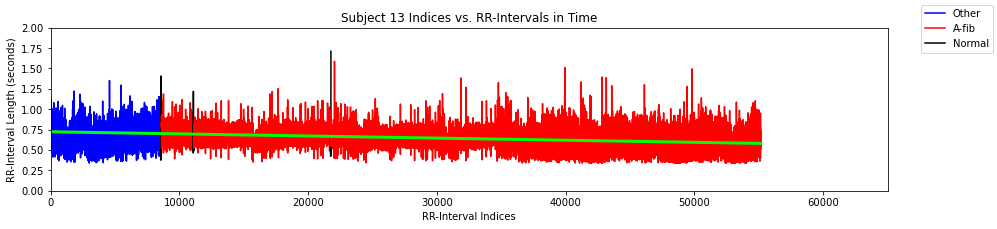

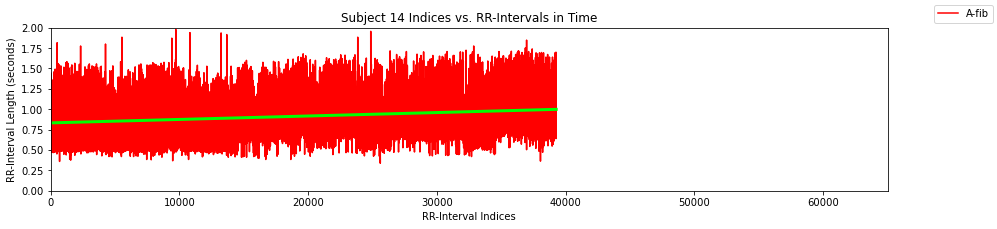

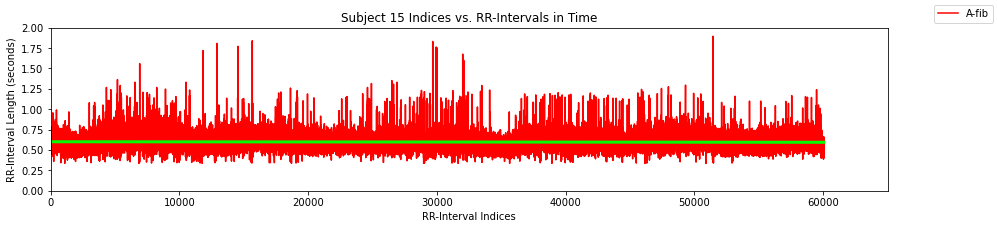

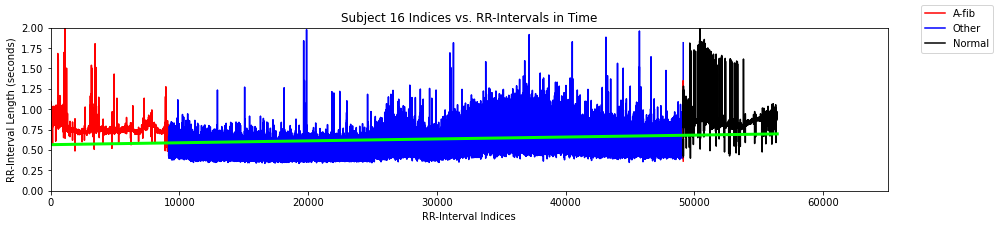

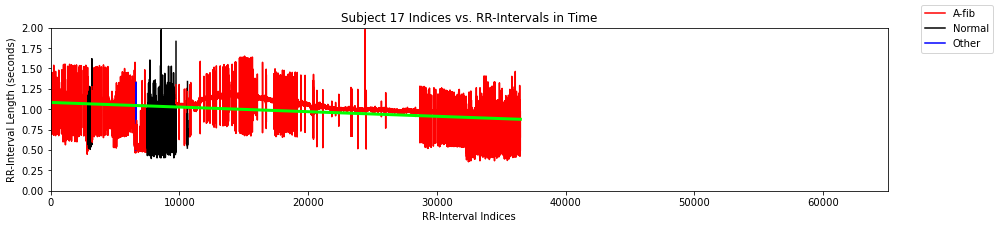

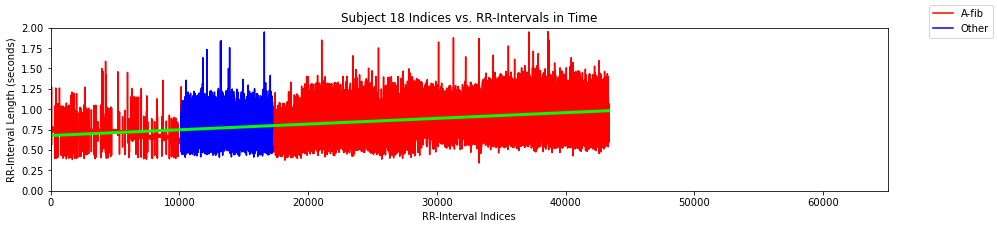

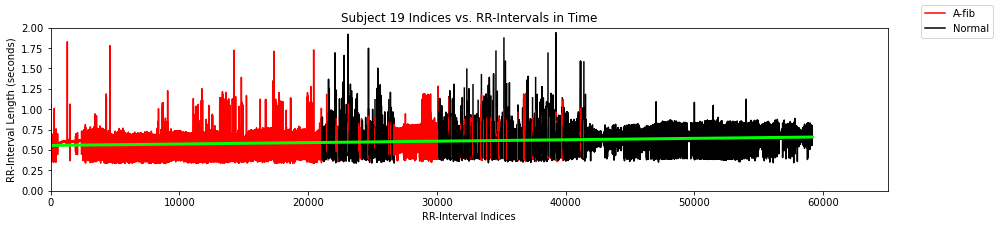

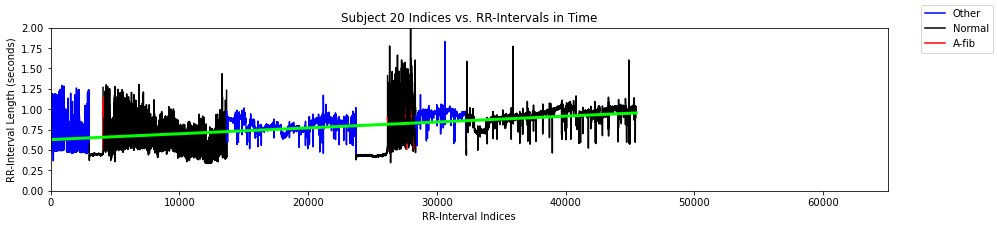

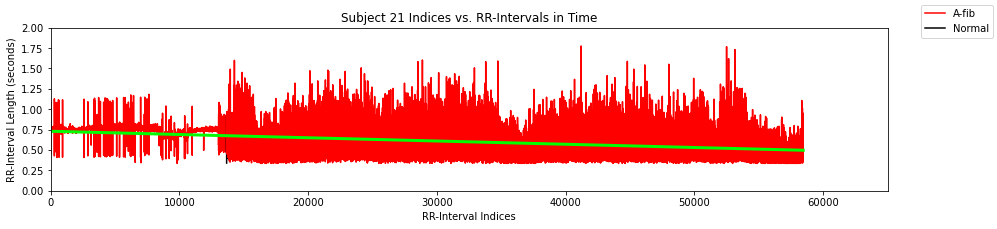

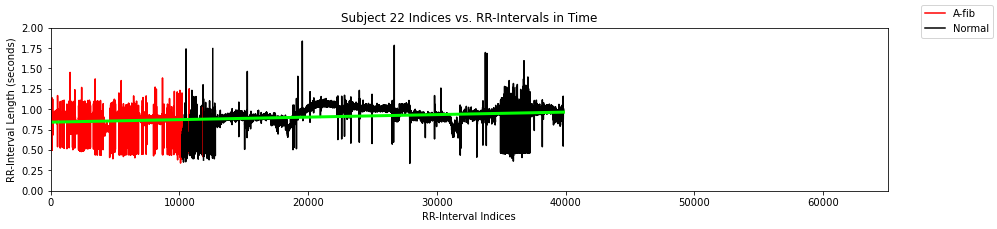

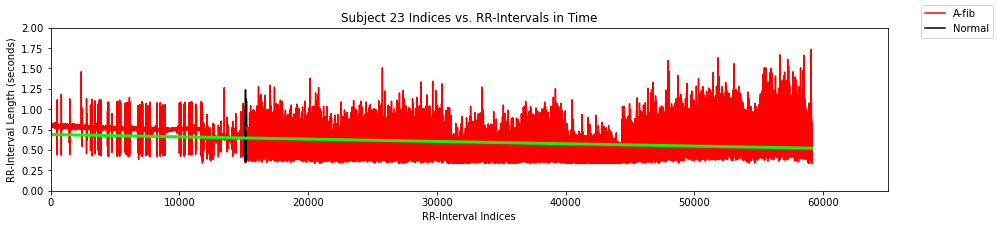

 83%|████████▎ | 19/23 [00:07<00:01,  2.45it/s]C:\Users\Luke\Github\svsm_ml_2022\Volatility.py:301: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots()
100%|██████████| 23/23 [00:03<00:00,  7.62it/s]


NameError: name 'subject_variance' is not defined

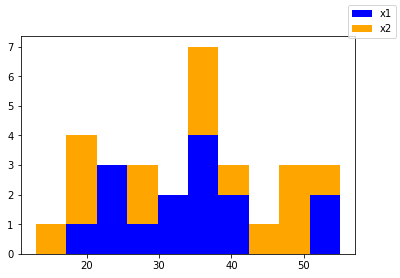

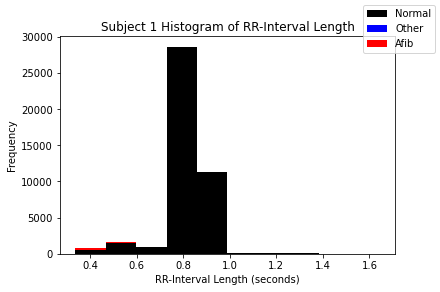

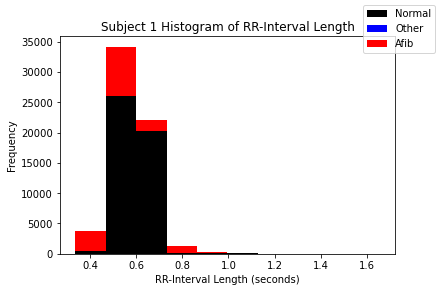

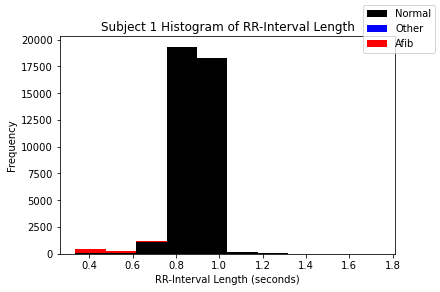

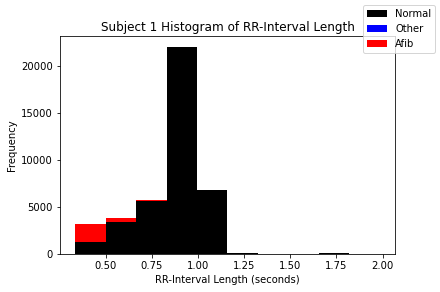

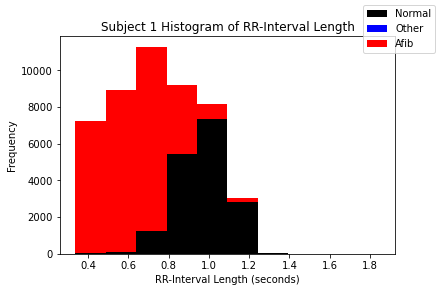

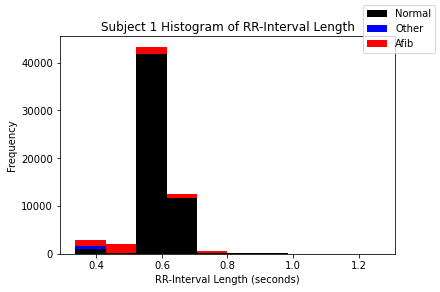

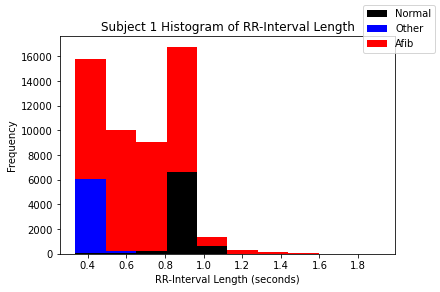

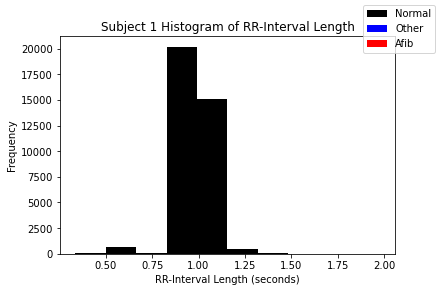

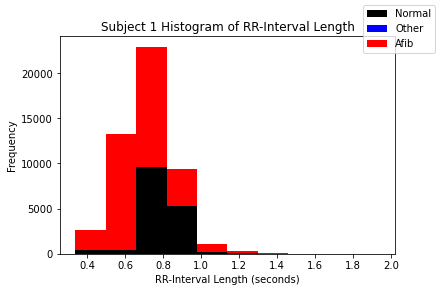

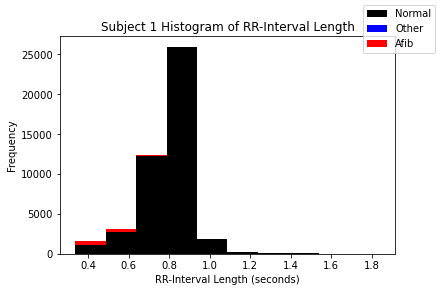

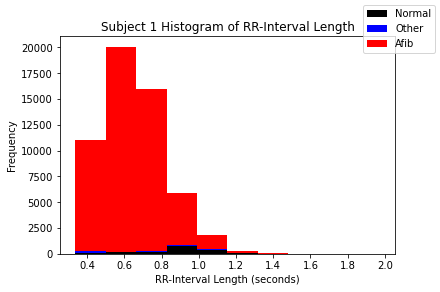

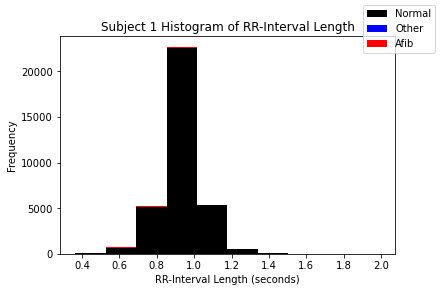

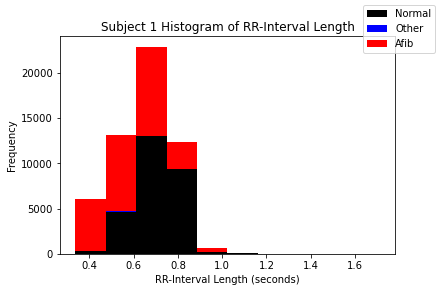

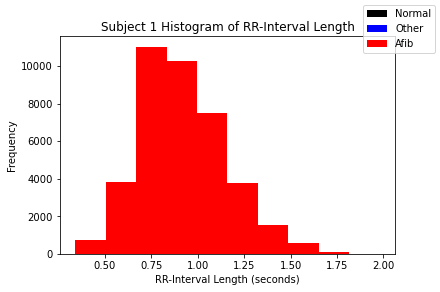

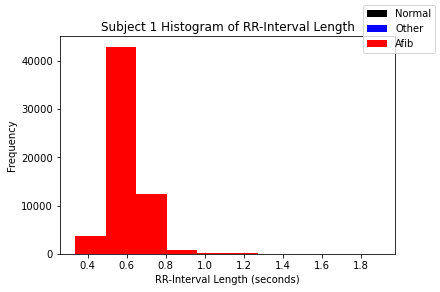

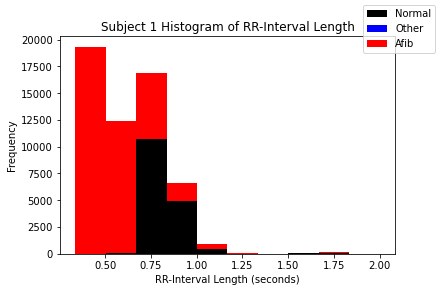

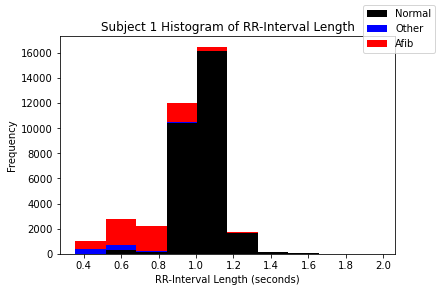

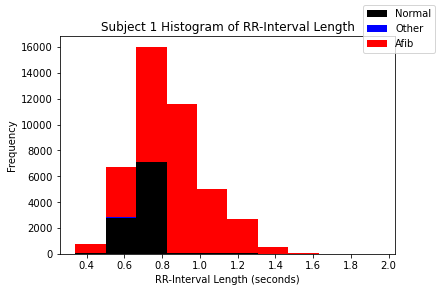

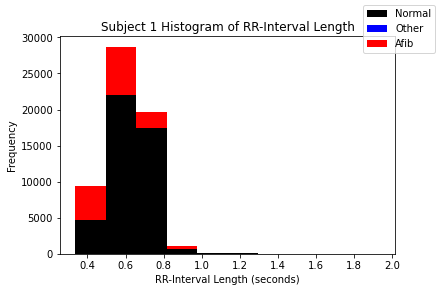

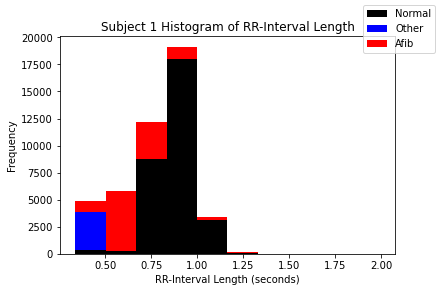

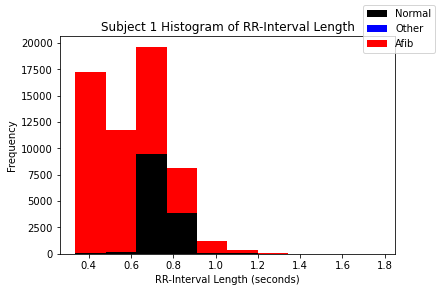

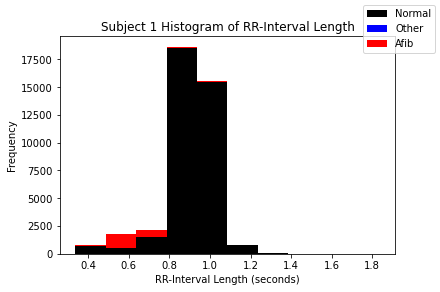

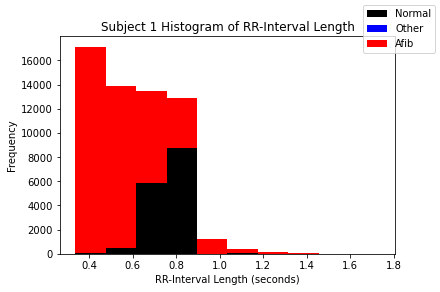

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import wfdb
import copy as cp
import scipy.signal as signal
import pickle
from sklearn import preprocessing
from tqdm import tqdm
import os
import re
import pandas as pd
import csv
from Volatility import subset_dataframes

In [2]:
record_list = [] # Initialize the array that will hold the list of our records

records = 'mit-bih-dataframes/subject_list.csv' # Get our record list like we did in the initial extraction
with open(records) as rfile:# Load our records into the array
    for record in rfile:
        record = record[0:-1] # The -1 removes the newline ("\n") character from the string
        record_list.append(record)

In [5]:
subject_dataframes = {}

for x in tqdm(record_list):
    subject_dataframes[x] = pd.read_csv('mit_bih_subset/' + x + '_subset_dataframe.csv')

  0%|          | 0/23 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'mit-bih-dataframes/04015subject_list.csv'

In [ ]:
print(subject_dataframes['04015'])

      Unnamed: 0        subsetID rhythmLabel
0              0     04015-0.csv      Normal
1              1     04015-1.csv      Normal
2              2     04015-2.csv      Normal
3              3     04015-3.csv      Normal
4              4     04015-4.csv      Normal
...          ...             ...         ...
1413        1413  04015-1413.csv      Normal
1414        1414  04015-1414.csv      Normal
1415        1415  04015-1415.csv      Normal
1416        1416  04015-1416.csv      Normal
1417        1417  04015-1417.csv      Normal

[1418 rows x 3 columns]


In [ ]:
rr_ints = [] # Initialize the array that will hold all of our subjects' RR-Intervals

for idx, subj in enumerate(record_list): # Iterate through our subject ids
    rr_ints.append(np.genfromtxt('mit-bih-rrintervals/'+str(subj)+'_rr-intervals.csv',delimiter=',')) # Add to master array
       #NOTE = change 'mit-bih-rr-intervals/' to the appropriate location


In [ ]:
#this removes outliers so copy-paste your own code here
#the comment is how I removed outliers
outlier_list=[]
rrs=[]
# for idx, subj in tqdm(enumerate(rr_ints)):
#     outlier = [[],[]] # I want to store the index and the outlier
#     for idx2, rr in enumerate(subj):
#         if rr > 500:
#             outlier[0].append(rr) # add the rr int to our list
#             outlier[1].append(idx2) # Add its index to our list
#     subj = np.delete(subj, outlier[1]) # Remove all found outliers from our subject 
#     rrs.append(subj) # Add it to our new rr interval list
#     outlier_list.append(outlier)

23it [00:00, 37.89it/s]


In [ ]:
#creates empty dictionary for subsets
subset_list = {}
for x in record_list:
    subset_list[x] = []
    


{'04015': [], '04043': [], '04048': [], '04126': [], '04746': [], '04908': [], '04936': [], '05091': [], '05121': [], '05261': [], '06426': [], '06453': [], '06995': [], '07162': [], '07859': [], '07879': [], '07910': [], '08215': [], '08219': [], '08378': [], '08405': [], '08434': [], '08455': []}


In [ ]:
#divides subsets by 25
subset_len_sec = 25 # Set the time we are going to subset by
subset_len_samp = subset_len_sec*250 # Get that timme in samplse

for idx, subj in tqdm(enumerate(rrs)):
    samp = 0
    while samp < len(subj):
        subs_len = 0
        subs = []
        while subs_len < subset_len_samp and samp<len(subj):
            rr = subj[samp]
            subs.append(rr)
            subs_len+=rr
            samp+=1
        subset_list[record_list[idx]].append(subs)

23it [00:01, 18.05it/s]


In [23]:
#Classifying transitions between RR-Ints as short, medium, or long using running mean
int_types = []

for idx, subject in tqdm(enumerate(record_list)):
    #list of types of rr_ints for each subject
    subject_types = []
    for i, subset in enumerate(subset_list[subject]):
        subset_types = []
        for j, rr_ints in enumerate(subset):
            if j==0:
                runningmean = rr_ints
            runningmean = 0.75*runningmean + 0.25*rr_ints
            if rr_ints < _____: 
                #if rr_ints is less than 85% of runningmean
                #label subject type as short


            elif rr_ints > ____: 
                #if rr_ints is greater than 115% of runningmean
                #label subject type as long


            else:
                #label subject type as regular


        subject_types.append(subset_types)
    int_types.append(subject_types)



IndentationError: expected an indented block (2839532435.py, line 18)

In [22]:
#Classifying transitions between RR-Ints as short, medium, or long using running mean
transitions_list=[]

for idx, subject in enumerate(int_types): 
    subject_transitions = []
    for j, subset in enumerate(subject):
        StoS, StoR, StoL, RtoS, RtoR, RtoL, LtoS, LtoR, LtoL = [0]*9
        count = 0
        for i, rr_int in enumerate(subset):
            if i<len(subset)-1:
                count += 1
                if subset[i]== short and subset[i+1]== short:
                  #if subset is short to short
                  #add one to the StoS counter
                    StoS += 1

                elif subset[i]== short and subset[i+1]== regular:
                  #if subset is short to regular
                  #add one to the StoR counter
                    StoR += 1

                elif subset[i]== short and subset[i+1]== long:
                  #if subset is short to long
                  #add one to the StoL counter
                    StoL += 1
                    
                elif subset[i]== regular and subset[i+1]== regular:
                  #if subset is short to short
                  #add one to the StoS counter
                    RtoR += 1

                elif subset[i]== regular and subset[i+1]== long:
                  #if subset is short to regular
                  #add one to the StoR counter
                    RtoL += 1

                elif subset[i]== regular and subset[i+1]== short:
                  #if subset is short to long
                  #add one to the StoL counter
                    RtoS += 1
                    
                elif subset[i]== long and subset[i+1]== short:
                  #if subset is short to short
                  #add one to the StoS counter
                    LtoS += 1

                elif subset[i]== long and subset[i+1]== regular:
                  #if subset is short to regular
                  #add one to the StoR counter
                    LtoR += 1

                elif subset[i]== long and subset[i+1]== long:
                  #if subset is short to long
                  #add one to the StoL counter
                    LtoL += 1

                #repeat for... 
                #regular to short
                #regular to regular
                #regular to long
                #long to short
                #long to regular
                #long to long
        subject_transitions.append([StoS/count, StoR/count, StoL/count, RtoS/count, RtoR/count, RtoL/count, LtoS/count, LtoR/count, LtoL/count])
    transitions_list.append(subject_transitions)

NameError: name 'int_types' is not defined

In [ ]:
print(transitions_list[0][0])

[0.2, 0.05714285714285714, 0.02857142857142857, 0.05714285714285714, 0.22857142857142856, 0.14285714285714285, 0.05714285714285714, 0.11428571428571428, 0.11428571428571428]


In [ ]:
#Standard deviation
Std_list = []
for i, subject in enumerate(record_list):
    Standard_devs = []
    for j, subset in enumerate(subset_list[subject]):
        standard_dev = np.std(subset)
        Standard_devs.append(standard_dev)
    Std_list.append(Standard_devs)

In [ ]:
#Coefficient of variance(std/mean)
#same formatting as std but divide by mean to obtain CoefOfVar


In [ ]:
#Range
#same formatting as std but range is maximum of subset minus minimum of subset
    



In [ ]:
dfdic = {}
for idx, subj in tqdm(enumerate(record_list)):
    dfdic[subj] = pd.DataFrame(
        data = np.transpose(np.array([
                                    [x[0] for x in transitions_list[idx]],
                                    [x[1] for x in transitions_list[idx]],
                                    [x[2] for x in transitions_list[idx]],
                                    [x[3] for x in transitions_list[idx]],
                                    [x[4] for x in transitions_list[idx]],
                                    [x[5] for x in transitions_list[idx]],
                                    [x[6] for x in transitions_list[idx]],
                                    [x[7] for x in transitions_list[idx]],
                                    [x[8] for x in transitions_list[idx]],
                                    Std_list[idx],
                                    CoefVar_list[idx],
                                    Range_list[idx],
                                    ])
                           ),
        columns = ['StoS', 'StoR', 'StoL', 'RtoS', 'RtoR', 'RtoL', 'LtoS', 'LtoR', 'LtoL', 'STD', 'CoefVar', 'Range']
    )


23it [00:00, 58.55it/s]


In [27]:
for idx, x in enumerate(record_list):
    dfdic[x] = pd.concat([subject_dataframes[x], dfdic[x]], axis=1)

KeyError: '04015'

In [26]:
dfdic['04015']

NameError: name 'dfdic' is not defined

In [ ]:
reload_flag = False
for idx, x in enumerate(record_list):
    if not os.path.exists('mit-bih-features/'+x+ '.csv') or reload_flag:
        dfdic[x].to_csv('mit-bih-features/'+x+'.csv') 


In [24]:
print(record_list)

['04015', '04043', '04048', '04126', '04746', '04908', '04936', '05091', '05121', '05261', '06426', '06453', '06995', '07162', '07859', '07879', '07910', '08215', '08219', '08378', '08405', '08434', '08455']
